### Logistic Regression

- example from Wiki: https://en.wikipedia.org/wiki/Logistic_regression 

In [60]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [61]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.2
numpy version: 1.24.1
seaborn version: 0.12.2


In [62]:
# import csv data to dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv' # Aj.Prasert's github
df = pd.read_csv(url)
df.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [63]:
df.T # transpose data - ### 0 mean fail, 1 means Pass

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


<AxesSubplot: xlabel='Hours', ylabel='Pass'>

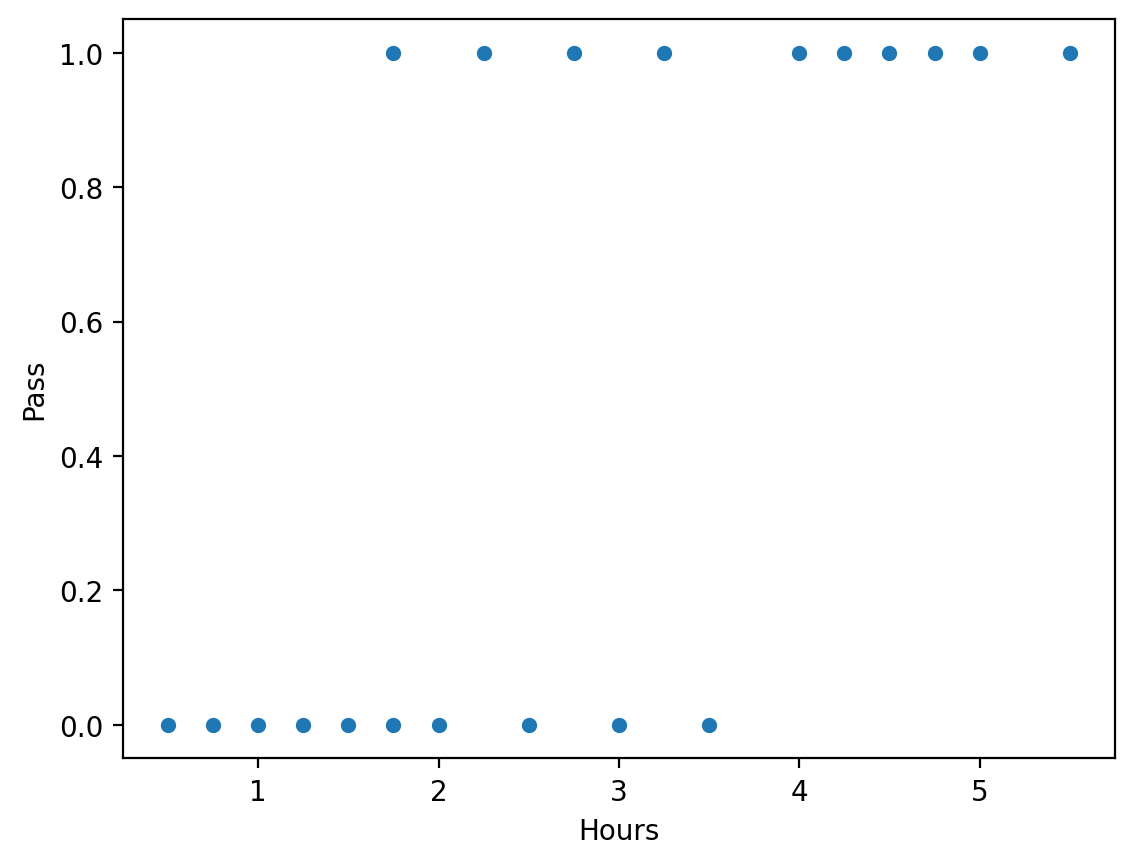

In [64]:
sns.scatterplot(data = df, x = 'Hours', y = 'Pass')

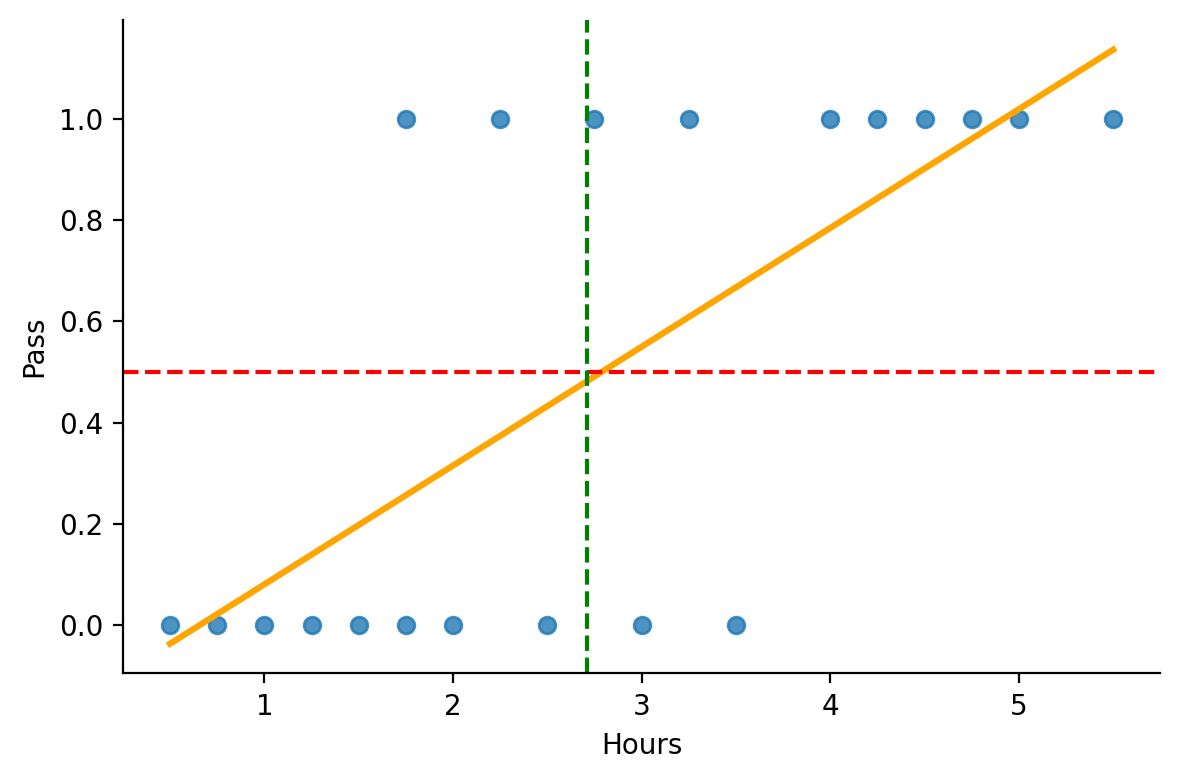

In [65]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = False, ci = None, height = 4, aspect = 1.5, line_kws = {'color': 'orange'}) # 'orange' is forcast line
plt.axhline(.5, color = 'red', linestyle = '--')
plt.axvline(2.71, color = 'green', linestyle = '--');

# we can't decide using green line's left and right side as pass or fail

In [66]:
df.at[19, 'Hours'] = 100

In [67]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,100.0
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


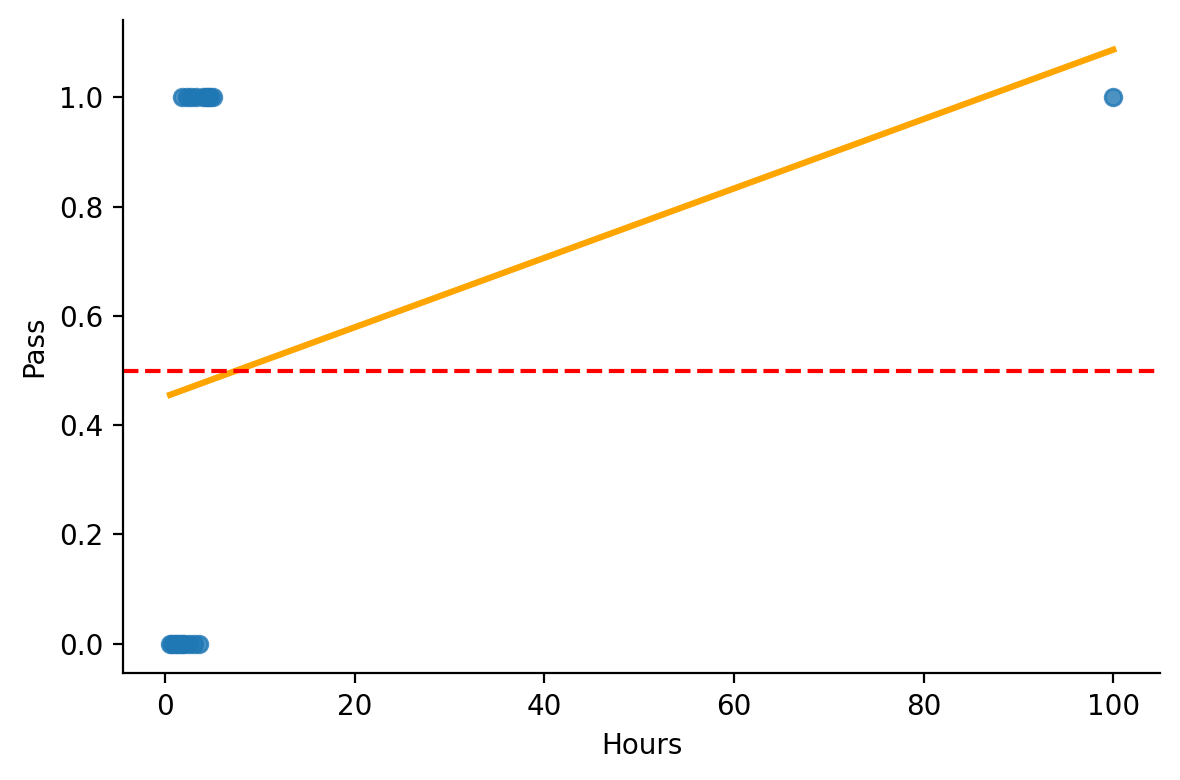

In [68]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = False, ci = None, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})
plt.axhline(.5, color = 'red', linestyle = '--');

In [69]:
df.at[19, 'Hours'] = 5.5 # original data

In [70]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


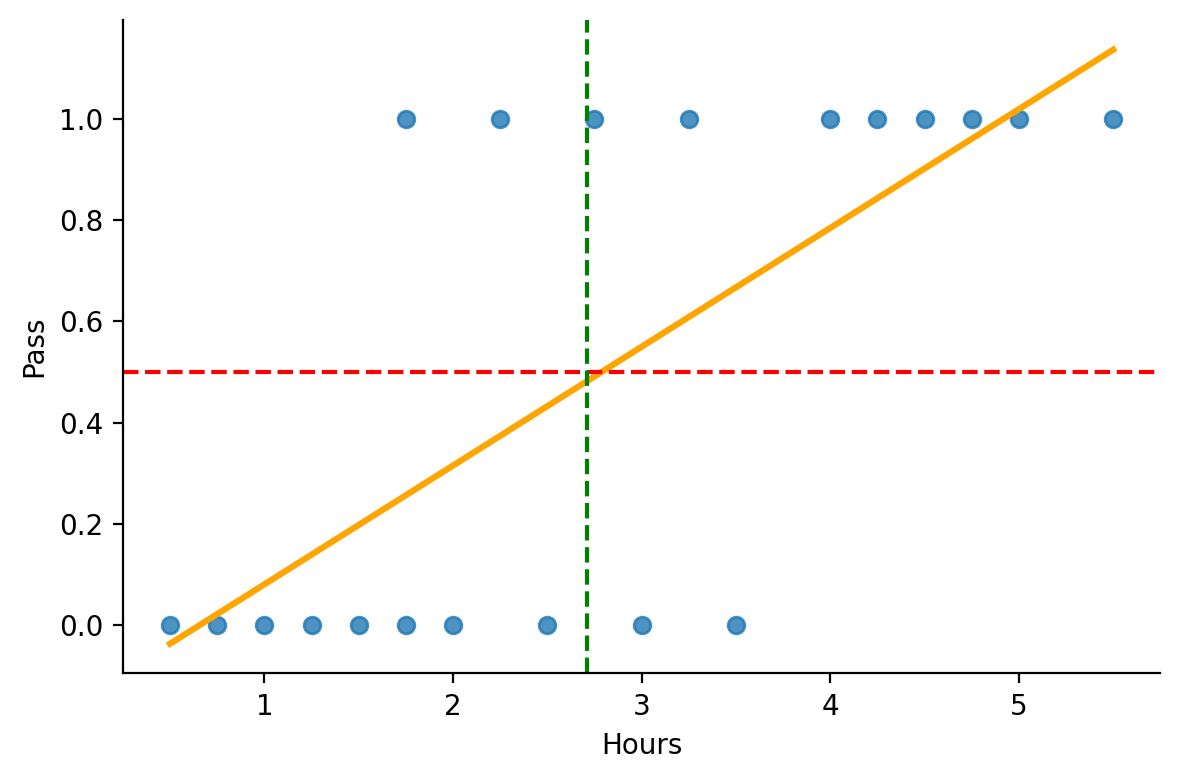

In [71]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = False, ci = None, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})
plt.axhline(.5, color = 'red', linestyle = '--')
plt.axvline(2.71, color = 'green', linestyle = '--');

# we can't decide using green line's left and right side as pass or fail. So we cannot use the linear regression, require to use sigmoi fn

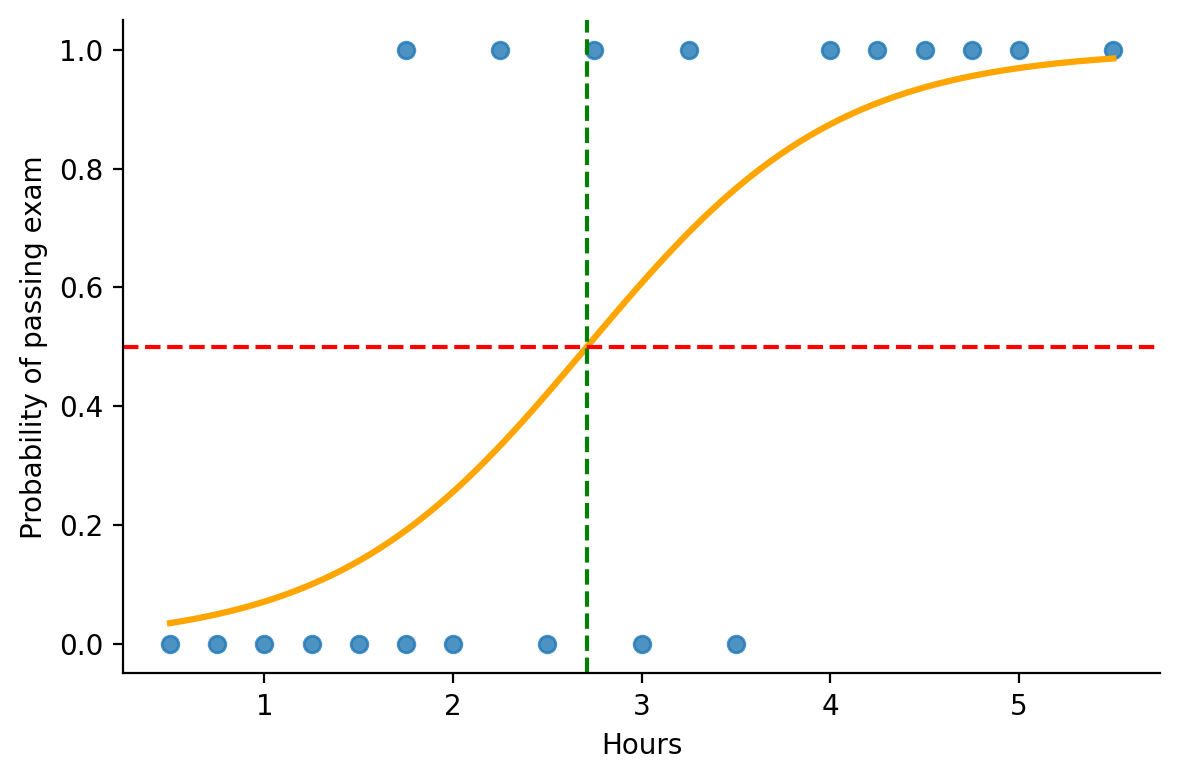

In [72]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, ci = None, height = 4, aspect = 1.5, line_kws = {'color': 'orange'}) # sigmoi function
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--');

In [73]:
df.at[19, 'Hours'] = 100 # change data at index = 19

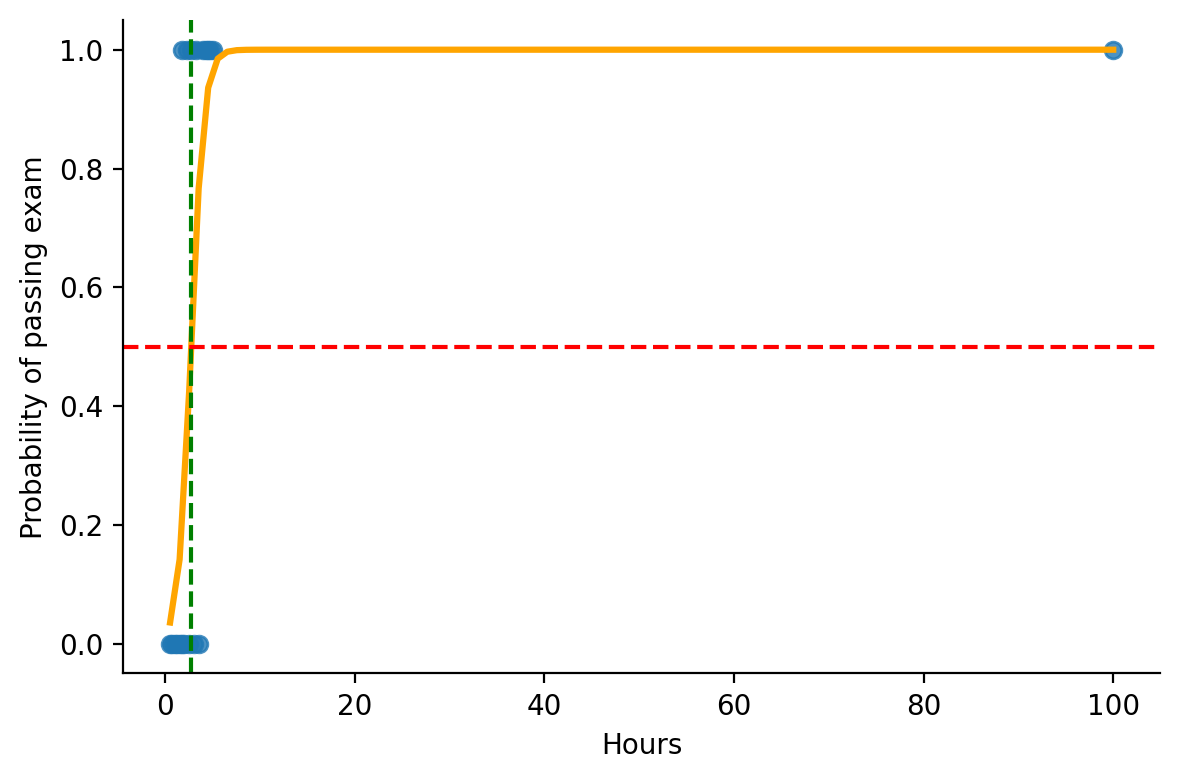

In [74]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, ci = None, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--');

In [75]:
df.at[19, 'Hours'] = 5.5 # original data

In [76]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


### Statsmodels

In [77]:
from patsy import dmatrices # use to create data to use in statesmodels
import statsmodels.api as sm

In [78]:
y, X = dmatrices('Pass ~ Hours', data = df, return_type = 'dataframe') # with intercept column, here we use the R style
# y, X = dmatrices('Pass ~ Hours - 1', data = df, return_type = 'dataframe') # no intercept column

In [79]:
X.head() # we will get the intercept column

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [80]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### model_a (with intercept)

In [81]:
model_a = sm.Logit(y, X).fit() # pass y the pass X
print(model_a.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.4208
Time:                        09:00:46   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.

In [82]:
#  LLR p-value: 0.0006365 Likelyhood ratio is good per the p-value

In [83]:
print(model_a.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Pass             Pseudo R-squared: 0.421     
Date:               2023-08-14 09:00 AIC:              20.0598   
No. Observations:   20               BIC:              22.0512   
Df Model:           1                Log-Likelihood:   -8.0299   
Df Residuals:       18               LL-Null:          -13.863   
Converged:          1.0000           LLR p-value:      0.00063648
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369



In [84]:
model_a.predict([[1, 2], [1, 4]]) # to get the probability of fail or pass ( > 0.5 is Pass)

array([0.25570318, 0.8744475 ])

In [85]:
model_a.predict(X) # pass a dataframe X

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

In [86]:
model_a.predict(X).apply(lambda p: 0 if p < .5 else 1) # pass a datagram X by assign value to 0 or 1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [87]:
model_a.params

Intercept   -4.077713
Hours        1.504645
dtype: float64

In [88]:
model_a.params['Intercept'] # we can use name or index to get data

-4.077713431087631

In [89]:
model_a.params[0]

-4.077713431087631

In [90]:
model_a.params[1]

1.5046454283733335

In [91]:
model_a.params['Hours']

1.5046454283733335

In [92]:
# add a new column named 'predicted'

df['predicted'] = model_a.predict(X).apply(lambda p: 0 if p < 0.5 else 1)
df

,Hours,Pass,predicted
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [93]:
# add new columns of 'log_odds', 'odds', 'prob'

df['log_odds'] = model_a.params['Intercept'] + model_a.params['Hours']* df['Hours'] # logodds can read more details in the wiki
df['odds'] = np.exp(model_a.params['Intercept'] + model_a.params['Hours']* df['Hours'])
df['prob'] = model_a.predict(X)
df

,Hours,Pass,predicted,log_odds,odds,prob
0,0.50,0,0,-3.325391,0.035958,0.034710
1,0.75,0,0,-2.949229,0.052380,0.049773
2,1.00,0,0,-2.573068,0.076301,0.070892
3,1.25,0,0,-2.196907,0.111146,0.100029
4,1.50,0,0,-1.820745,0.161905,0.139344
5,1.75,0,0,-1.444584,0.235844,0.190837
6,1.75,1,0,-1.444584,0.235844,0.190837
7,2.00,0,0,-1.068423,0.343550,0.255703
8,2.25,1,0,-0.692261,0.500443,0.333530
9,2.50,0,0,-0.316100,0.728987,0.421627


### Statesmodels: confusion matrix

In [94]:
model_a.pred_table()

array([[8., 2.],
       [2., 8.]])

In [95]:
tn, fp, fn, tp = model_a.pred_table().ravel()

In [96]:
print(f'tn = {tn}') # true negative
print(f'fp = {fp}') # false positive
print(f'fn = {fn}') # false negative
print(f'tp = {tp}') # true positive

tn = 8.0
fp = 2.0
fn = 2.0
tp = 8.0


In [97]:
(tp + tn)/(tp+tn+fp+fn) # accuracy value from confusion matrix

0.8

### Visualize

sigmoi function: f(x) = 1/(1 + e**(-x))

In [98]:
import math

In [99]:
def sg(intercept, coef, x):

    ex = math.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

In [100]:
def sp(intercept, coef, x): # universal function

    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

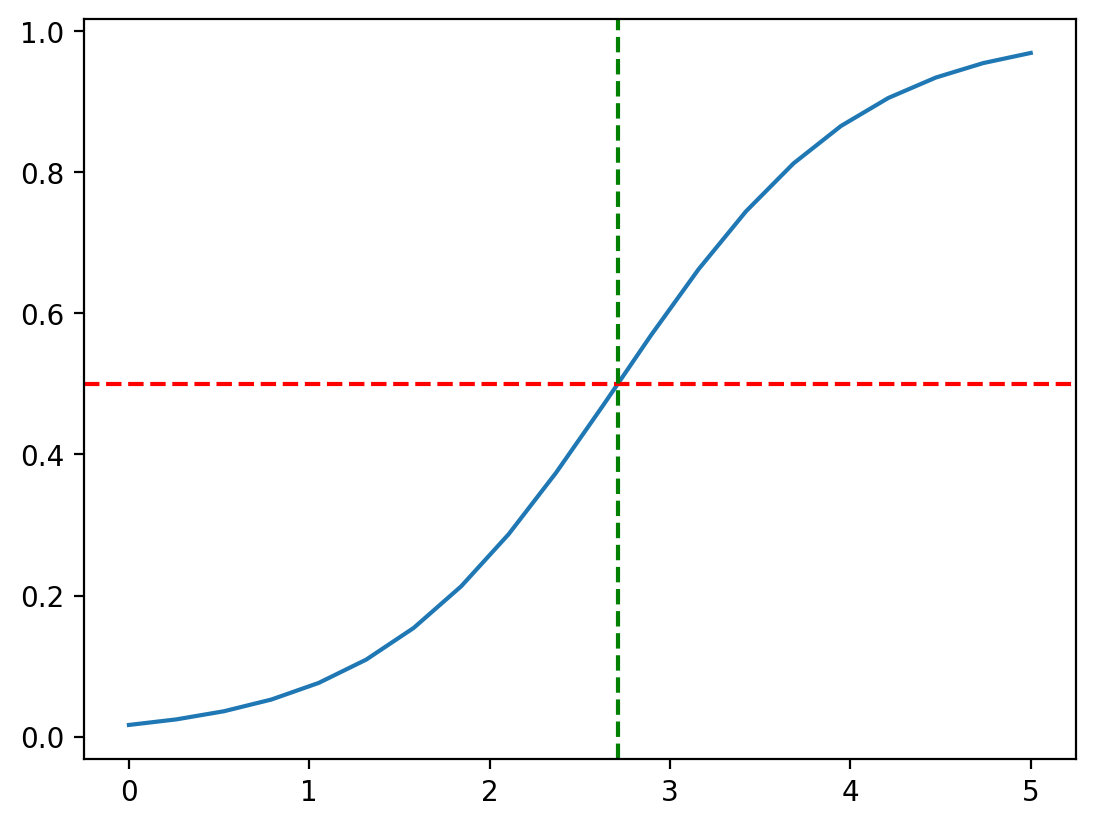

In [101]:
xp = np.linspace(0, 5, 20)
yp = sp(model_a.params[0], model_a.params[1], xp)

plt.plot(xp, yp)
plt.axhline(.5, color = 'red', linestyle = '--');
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']), color = 'green', linestyle = '--');


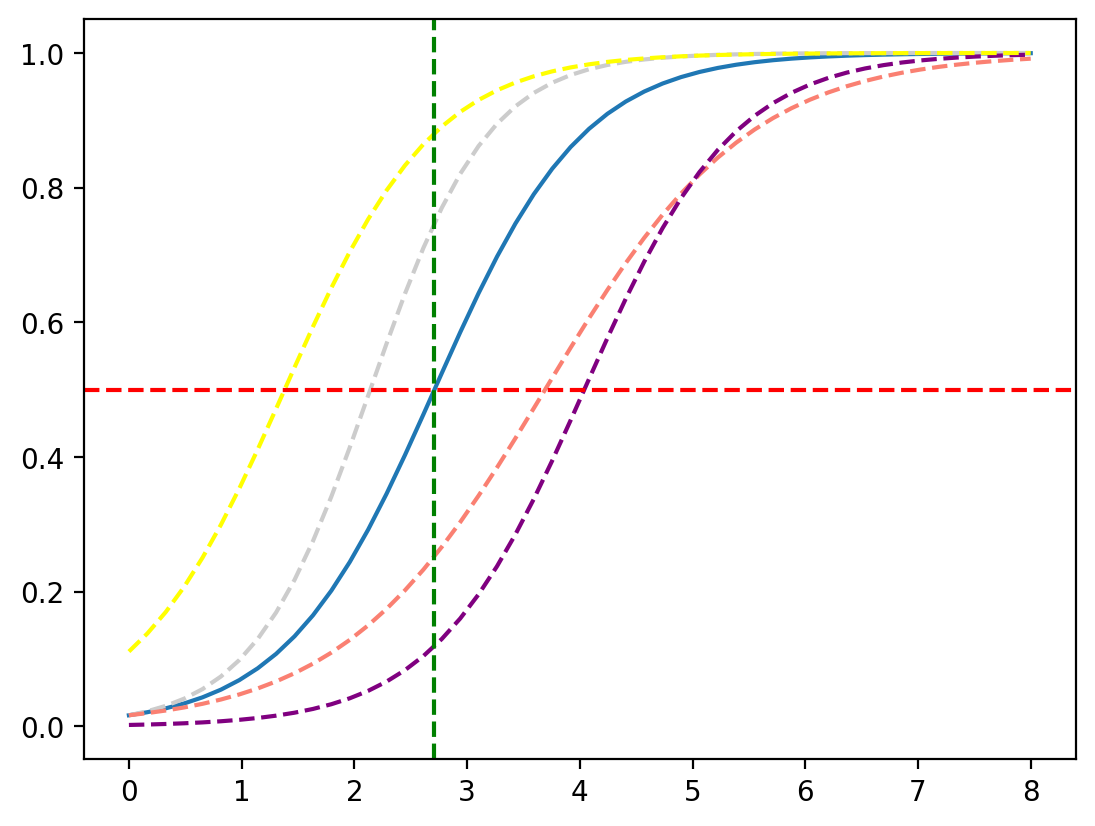

In [102]:
xp = np.linspace(0, 8, 50)
yp = sp(model_a.params[0], model_a.params[1], xp)
yp2 = sp(model_a.params[0], model_a.params[1] + 0.4, xp) # params[1] is coeficient of Hours
yp3 = sp(model_a.params[0], model_a.params[1] - 0.4, xp)
yp4 = sp(model_a.params[0] - 2, model_a.params[1], xp) # params[0] is coeficient of Intercept
yp5 = sp(model_a.params[0] + 2, model_a.params[1], xp)

plt.plot(xp, yp)
plt.plot(xp, yp2, color = '0.8', linestyle = '--')
plt.plot(xp, yp3, color = 'salmon', linestyle = '--')
plt.plot(xp, yp4, color = 'purple', linestyle = '--')
plt.plot(xp, yp5, color = 'yellow', linestyle = '--')

plt.axhline(.5, color = 'red', linestyle = '--');
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']), color = 'green', linestyle = '--');


### model_b (no intercept)

In [103]:
# run logistic regression

y_b, X_b = dmatrices('Pass ~ Hours - 1', df, return_type = 'dataframe') # no Intercept column, here we will get a lot of error. let's see the folowing below cells

In [104]:
X_b # we get only Hours column to use

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [105]:
y_b

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [106]:
model_b = sm.Logit(y_b, X_b).fit()

Optimization terminated successfully.
         Current function value: 0.639808
         Iterations 5


In [107]:
print(model_b.summary())

                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                 0.07695
Time:                        09:00:46   Log-Likelihood:                -12.796
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          0.2179      0.157      1.390      0.165      -0.089       0.525


In [108]:
print(model_b.summary2())

                        Results: Logit
Model:              Logit            Method:           MLE    
Dependent Variable: Pass             Pseudo R-squared: 0.077  
Date:               2023-08-14 09:00 AIC:              27.5923
No. Observations:   20               BIC:              28.5881
Df Model:           0                Log-Likelihood:   -12.796
Df Residuals:       19               LL-Null:          -13.863
Converged:          1.0000           LLR p-value:      nan    
No. Iterations:     5.0000           Scale:            1.0000 
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Hours     0.2179     0.1568   1.3900   0.1645   -0.0894   0.5253



In [109]:
model_b.pred_table()

array([[ 0., 10.],
       [ 0., 10.]])

In [110]:
tn, fp, fn, tp = model_b.pred_table().ravel()

In [111]:
print(f'tn = {tn}') # true negative
print(f'fp = {fp}') # false positive
print(f'fn = {fn}') # false negative
print(f'tp = {tp}') # true positive

tn = 0.0
fp = 10.0
fn = 0.0
tp = 10.0


In [112]:
(tp + tn)/(tp+tn+fp+fn) # accuracy value from confusion matrix

0.5